# Some analysis of random data I found online

In [2]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading the file in
data = pd.read_excel('C:\\Users\\songs\\Desktop\\CSV files\\TCGA-BRCA Clinical Data 090616\\nationwidechildrens.org_clinical_radiation_brca.xlsx', header=1)

#Quick look at the data
data.info()
print(data.describe())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 18 columns):
bcr_patient_uuid                   92 non-null object
bcr_patient_barcode                92 non-null object
bcr_radiation_barcode              92 non-null object
bcr_radiation_uuid                 92 non-null object
form_completion_date               92 non-null object
radiation_type                     92 non-null object
anatomic_treatment_site            92 non-null object
radiation_dosage                   92 non-null object
units                              92 non-null object
numfractions                       92 non-null object
days_to_radiation_therapy_start    92 non-null object
radiation_treatment_ongoing        92 non-null object
days_to_radiation_therapy_end      92 non-null object
measure_of_response                92 non-null object
course_number                      92 non-null object
radiation_type_notes               92 non-null object
regimen_indication               

,bcr_patient_uuid,bcr_patient_barcode,bcr_radiation_barcode,bcr_radiation_uuid,form_completion_date,radiation_type,anatomic_treatment_site,radiation_dosage,units,numfractions,days_to_radiation_therapy_start,radiation_treatment_ongoing,days_to_radiation_therapy_end,measure_of_response,course_number,radiation_type_notes,regimen_indication,regimen_indication_notes
0,CDE_ID:,CDE_ID:2673794,CDE_ID:,CDE_ID:,CDE_ID:,CDE_ID:2842944,CDE_ID:2793522,CDE_ID:2721441,CDE_ID:61446,CDE_ID:61465,CDE_ID:3008313,CDE_ID:2842745,CDE_ID:3008333,CDE_ID:2857291,CDE_ID:2732184,CDE_ID:2195477,CDE_ID:2793511,CDE_ID:2793516
1,02bf5203-f9cd-4c5a-97b4-e5584dc22325,TCGA-AO-A0J8,TCGA-AO-A0J8-R3129,7699227a-2529-4bd0-bb64-08d7ffbe4aad,2010-09-19 00:00:00,EXTERNAL BEAM,Primary Tumor Field,5240,cGy,21,252,NO,281,[Not Available],1,[Not Applicable],ADJUVANT,[Not Available]
2,a4903de8-6cf5-4541-8ec7-065beace8b44,TCGA-AO-A0J9,TCGA-AO-A0J9-R3154,5e4bd8f8-0619-48a2-812d-c6f0626c1e60,2010-09-19 00:00:00,EXTERNAL BEAM,Regional site,11117,cGy,28,226,NO,263,[Not Available],1,[Not Applicable],ADJUVANT,[Not Available]
3,3ea9412b-429e-4dcf-90cd-c53be06885a1,TCGA-AO-A0JB,TCGA-AO-A0JB-R3175,4696646b-a422-4344-a88d-d9e532419e43,2010-09-06 00:00:00,EXTERNAL BEAM,Regional site,15120,cGy,28,216,NO,253,[Not Available],1,[Not Applicable],ADJUVANT,[Not Available]
4,f357fe19-5359-4662-8ce9-aa996132283b,TCGA-AO-A0JF,TCGA-AO-A0JF-R3205,605f8f77-3566-431e-93ae-33ec0b26904a,2010-09-06 00:00:00,EXTERNAL BEAM,Primary Tumor Field,5272,cGy,21,299,NO,328,[Not Available],1,[Not Applicable],ADJUVANT,[Not Available]
5,44bec761-b603-49c0-8634-f6bfe0319bb1,TCGA-AO-A0JM,TCGA-AO-A0JM-R3229,7e8ccc49-defa-4a33-bd6a-edb852153291,2010-09-20 00:00:00,EXTERNAL BEAM,Regional site,10000,cGy,25,260,NO,294,[Not Available],1,[Not Applicable],ADJUVANT,[Not Available]
6,c70ee5e1-4703-4996-bb5c-f4cca0fb53ba,TCGA-AO-A129,TCGA-AO-A129-R5883,0417042c-5493-4b8d-b969-7077215b602d,2010-12-08 00:00:00,EXTERNAL BEAM,Regional site,[Not Available],[Not Available],[Not Available],216,NO,246,[Not Available],1,[Not Applicable],ADJUVANT,[Not Available]
7,2fe854b4-bac9-4801-9a1c-ee99388e8082,TCGA-AO-A12D,TCGA-AO-A12D-R5893,be918525-d872-4c32-9a3b-104e79637323,2010-12-08 00:00:00,EXTERNAL BEAM,Regional site,10000,cGy,25,282,NO,316,[Not Available],1,[Not Applicable],ADJUVANT,[Not Available]
8,2cbeadff-a8a3-4787-9d4e-f6b74c3ab5d9,TCGA-AO-A12E,TCGA-AO-A12E-R5896,2f7dc558-30d7-46dc-8dfa-b8f59d9588bf,2010-12-08 00:00:00,EXTERNAL BEAM,Regional site,10080,cGy,28,251,NO,288,[Not Available],1,[Not Applicable],ADJUVANT,[Not Available]
9,495f9eda-b9be-4eef-bae1-766a4bfbd68e,TCGA-AO-A12F,TCGA-AO-A12F-R5904,d6634ff1-45f7-48bb-9b16-7b9d2f69a6db,2010-12-08 00:00:00,EXTERNAL BEAM,Regional site,5000,cGy,25,220,NO,254,[Not Available],1,[Not Applicable],ADJUVANT,[Not Available]


In [4]:
#Replacing some values and dropping some uninformative rows and columns
data = data.replace('[Not Available]', np.nan)
data = data.replace('[Not Applicable]', np.nan)
data = data.drop(data.index[0])
data = data.drop(data.iloc[:,[0,2,3]], axis = 1)

#Dropping some uninformative columns and converting some columns to categories. 
for x in data.columns:
    if data[x].count() == 0:
        data = data.drop(x, axis = 1)
    elif data[x].nunique() < 10:
        data[x] = data[x].astype('category')

#Converting some columns to datetime and others to numeric
data['form_completion_date'] = pd.to_datetime(data['form_completion_date'])
data['radiation_dosage'] = pd.to_numeric(data['radiation_dosage'])
data['numfractions'] = pd.to_numeric(data['numfractions'])
data['days_to_radiation_therapy_start'] = pd.to_numeric(data['days_to_radiation_therapy_start'])
data['days_to_radiation_therapy_end'] = pd.to_numeric(data['days_to_radiation_therapy_end'])

#Results:
data.info()
print(data.describe())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 1 to 91
Data columns (total 13 columns):
bcr_patient_barcode                91 non-null object
form_completion_date               91 non-null datetime64[ns]
radiation_type                     91 non-null category
anatomic_treatment_site            91 non-null category
radiation_dosage                   82 non-null float64
units                              82 non-null category
numfractions                       67 non-null float64
days_to_radiation_therapy_start    89 non-null float64
radiation_treatment_ongoing        91 non-null category
days_to_radiation_therapy_end      89 non-null float64
measure_of_response                30 non-null category
course_number                      61 non-null category
regimen_indication                 61 non-null category
dtypes: category(7), datetime64[ns](1), float64(4), object(1)
memory usage: 6.2+ KB
       radiation_dosage  numfractions  days_to_radiation_therapy_start  \
count      

,bcr_patient_barcode,form_completion_date,radiation_type,anatomic_treatment_site,radiation_dosage,units,numfractions,days_to_radiation_therapy_start,radiation_treatment_ongoing,days_to_radiation_therapy_end,measure_of_response,course_number,regimen_indication
1,TCGA-AO-A0J8,2010-09-19,EXTERNAL BEAM,Primary Tumor Field,5240.0,cGy,21.0,252.0,NO,281.0,NaN,1,ADJUVANT
2,TCGA-AO-A0J9,2010-09-19,EXTERNAL BEAM,Regional site,11117.0,cGy,28.0,226.0,NO,263.0,NaN,1,ADJUVANT
3,TCGA-AO-A0JB,2010-09-06,EXTERNAL BEAM,Regional site,15120.0,cGy,28.0,216.0,NO,253.0,NaN,1,ADJUVANT
4,TCGA-AO-A0JF,2010-09-06,EXTERNAL BEAM,Primary Tumor Field,5272.0,cGy,21.0,299.0,NO,328.0,NaN,1,ADJUVANT
5,TCGA-AO-A0JM,2010-09-20,EXTERNAL BEAM,Regional site,10000.0,cGy,25.0,260.0,NO,294.0,NaN,1,ADJUVANT
6,TCGA-AO-A129,2010-12-08,EXTERNAL BEAM,Regional site,NaN,NaN,NaN,216.0,NO,246.0,NaN,1,ADJUVANT
7,TCGA-AO-A12D,2010-12-08,EXTERNAL BEAM,Regional site,10000.0,cGy,25.0,282.0,NO,316.0,NaN,1,ADJUVANT
8,TCGA-AO-A12E,2010-12-08,EXTERNAL BEAM,Regional site,10080.0,cGy,28.0,251.0,NO,288.0,NaN,1,ADJUVANT
9,TCGA-AO-A12F,2010-12-08,EXTERNAL BEAM,Regional site,5000.0,cGy,25.0,220.0,NO,254.0,NaN,1,ADJUVANT
10,TCGA-AQ-A04H,2010-12-16,EXTERNAL BEAM,Primary Tumor Field,NaN,NaN,NaN,138.0,NO,166.0,NaN,1,ADJUVANT


In [5]:
#Wide range in radiation_dosage, look at units?
print(data['units'].unique())

#There appears to be differing units. Converting from grays (Gy) to centigrays (cGy)
gray = data[data.units == 'Gy']
gray_list = list(gray.index)

for index in gray_list:   
    data.loc[index,'radiation_dosage'] = data.loc[index,'radiation_dosage'] * 100
    data.loc[index,'units'] = 'cGy'
    
print(data['radiation_dosage'].describe())

[cGy, NaN, Gy]
Categories (2, object): [cGy, Gy]
count       82.000000
mean      6037.560976
std       2435.935834
min        900.000000
25%       5248.000000
50%       6040.000000
75%       6100.000000
max      15900.000000
Name: radiation_dosage, dtype: float64


In [6]:
#Taking a look at those with "NaN values"
nan_list = data[data['units'].isnull()]
print(nan_list)

#Looks like these columns simply don't have a radiation dosage. That's useful data, we don't need to delete that.

#Since all the values in the "units" columns have been converted, we don't need it anymore.
data = data.drop('units', axis = 1)

#Also, there's no distinction to be made between "External" and "External Beam" therapy (According to Google)
data = data.drop('radiation_type', axis = 1)

   bcr_patient_barcode form_completion_date radiation_type  \
6         TCGA-AO-A129           2010-12-08  EXTERNAL BEAM   
10        TCGA-AQ-A04H           2010-12-16  EXTERNAL BEAM   
21        TCGA-BH-A0B3           2010-11-03  EXTERNAL BEAM   
38        TCGA-BH-A0GZ           2010-11-17  EXTERNAL BEAM   
45        TCGA-BH-A0W5           2012-07-29       External   
76        TCGA-EW-A1OY           2012-05-15  EXTERNAL BEAM   
79        TCGA-EW-A2FR           2012-05-23  EXTERNAL BEAM   
82        TCGA-EW-A423           2013-01-04       External   
91        TCGA-OL-A6VO           2014-08-12       External   

   anatomic_treatment_site  radiation_dosage units  numfractions  \
6            Regional site               NaN   NaN           NaN   
10     Primary Tumor Field               NaN   NaN           NaN   
21     Primary Tumor Field               NaN   NaN           NaN   
38     Primary Tumor Field               NaN   NaN           NaN   
45     Primary Tumor Field             

In [1]:
#Taking a look at the distribution of the numeric variables

plt.subplots()
plt.hist(data['radiation_dosage'])
plt.title('Distribution of Radiation Dosage')
plt.xlabel('Number of Patients')
plt.ylabel('Absorbance Dose in cGy')
plt.show()

plt.hist(data['numfractions'])
plt.title('Fractions')
plt.xlabel('Number of Patients')
plt.ylabel('Percentage of Fractionation (?)')
plt.show()

plt.hist(data['days_to_radiation_therapy_start'])
plt.title('Days until beginning radiation therapy')
plt.xlabel('Number of Patients')
plt.ylabel('Number of Days')
plt.show()

plt.hist(data['days_to_radiation_therapy_end'])
plt.title('Days until ending radiation therapy')
plt.xlabel('Number of Patients')
plt.ylabel('Number of Days')
plt.show()


NameError: name 'plt' is not defined

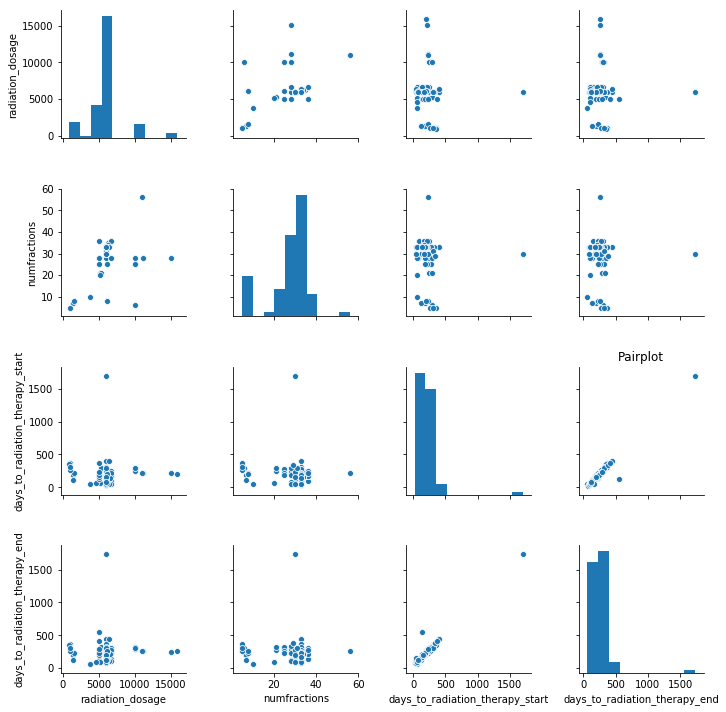

In [8]:
#Doing a seaborn pairplot of the data.
import seaborn as sns

sns.pairplot(data.drop('course_number', axis = 1))
plt.title('Pairplot')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()